# Classes and Objects
This is our week 3 examples notebook and will be available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [54]:
import random
import matplotlib.pyplot as plt
from pprint import pprint

## Problem: Collision detection using circles

In [62]:
class Circle:
    def __init__(self, centre, radius):
        """
            Initialze a Circle object with given centre and radius
            :param centre: 2-tuple with (x, y) coordinate of centre
            :param radius: numeric radius of circle
        """
        self.centre = centre
        self.radius = radius

    def __str__(self):
        return f'c:{self.centre} r:{self.radius}'

    def move(self, offset):
        """ Move this circle by given (x,y) offset """
        self.centre = tuple(w1 + w2 for w1,w2 in zip(self.centre, offset) )

    def distance(self, other):
        """ Return the distance between this circle and the other one """
        return sum(abs(w1-w2)**2 for w1,w2 in zip(self.centre, other.centre)) **0.5

    def intersects(self, other):
        """ Return True iff this circle intersects the other one """
        return self.distance(other) <=  self.radius + other.radius

In [70]:
c1 = Circle(centre=(4,4), radius=2)
c2 = Circle(centre=(9, 9), radius=2)
def print_state():
    print('State:', str(c1), str(c2), 'Dist:', round(c1.distance(c2), 2), 'Intersects?', c1.intersects(c2))
print_state()
c1.move((2,2))
print_state()
c2.move((-1, 0))
print_state()

State: c:(4, 4) r:2 c:(9, 9) r:2 Dist: 7.07 Intersects? False
State: c:(6, 6) r:2 c:(9, 9) r:2 Dist: 4.24 Intersects? False
State: c:(6, 6) r:2 c:(8, 9) r:2 Dist: 3.61 Intersects? True


## Problem:  Counting
When conducting an experiment, it is common to count occurances.  For example

* in a physics experiment, we might count the number of atomic collisions in which certain sub-atomic particles were produced
* in biology, we might count the number of cells infected by a virus after a fixed time period
* in a computational experiment, we might count the frequency with which clusters of a give size form

To visualize such experimental results, we would generally plot a histogram, like this:


[]

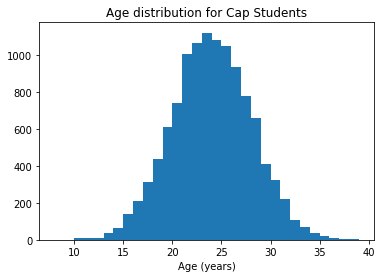

In [56]:
# Experiment: Get the age distribution for Cap students
n_cap_students = 11500

# Simulate getting the age for one Cap student
def get_age():
    return int(random.normalvariate(mu=24, sigma=4))  # Normally distributed age with mean of 24 years

# Run experiment to obtain the age for each student
data = [get_age() for i in range(n_cap_students)]

# Set the number of bins to the number of ages we found
n_bins = len(set(data))

fig, ax = plt.subplots()
ax.set_title("Age distribution for Cap Students")
ax.set_xlabel('Age (years)')

# plot a histogram of the data, divided into n "equal width" bins
ax.hist(data, bins=n_bins)
plt.plot()

## Custom Histogram Class

Define our own historgram class that serves as a "wrapper" for clunky pyplot ax.hist

In [57]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel=None):
        fig, ax = plt.subplots()
        ax.set_title(title)
        if xlabel:
            ax.set_xlabel(xlabel)
        ax.set_ylabel('Count')
        self.ax = ax
        self.fig = fig
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

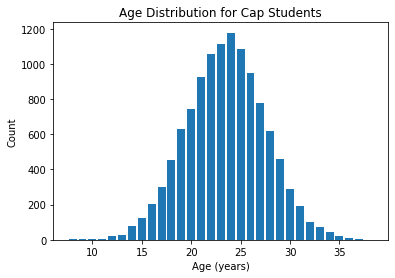

In [58]:
hist = Histogram(title='Age Distribution for Cap Students', xlabel='Age (years)')
for i in range(n_cap_students):
    hist.count(get_age())
hist.plot()